<a href="https://colab.research.google.com/github/dileep999999/ML/blob/main/3_cat_dog_classifier_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of Convolutional Neural Networks

In [1]:
!wget https://www.dropbox.com/s/31k0qimdnxo53rh/dogs-vs-cats.zip
!unzip "dogs-vs-cats.zip"
!rm "dogs-vs-cats.zip"
!unzip 'train.zip'
!unzip 'test1.zip'
!rm 'train.zip'
!rm 'test1.zip'

Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical,load_img
from sklearn.model_selection import train_test_split
import os

In [3]:
Image_width = 128
Image_height = 128
Image_size = (Image_width , Image_height)
Image_channel = 3

Image_rgb_size = (Image_width ,Image_height , 3 )

In [4]:
filenames = os.listdir('/content/train')
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    categories.append(category)
data = pd.DataFrame({'filename' : filenames , 'category' : categories})
data.head()

,filename,category
0,cat.10832.jpg,cat
1,dog.7644.jpg,dog
2,cat.4761.jpg,cat
3,dog.2665.jpg,dog
4,dog.9919.jpg,dog


In [5]:
data['category'].value_counts()

,count
category,
cat,12500
dog,12500


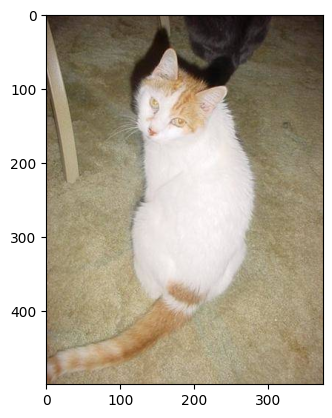

In [6]:
import random
sample = random.choice(filenames)
image = load_img(f'train/{sample}')
plt.imshow(image)
plt.show()

In [7]:
train_df , val_df = train_test_split(data , test_size = 0.2 , random_state = 42)
train_df = train_df.reset_index(drop = True)
val_df = val_df.reset_index(drop = True)

In [8]:
train_df.shape , val_df.shape

((20000, 2), (5000, 2))

In [9]:
train_df.head()

,filename,category
0,dog.72.jpg,dog
1,dog.7314.jpg,dog
2,dog.8487.jpg,dog
3,cat.6494.jpg,cat
4,cat.8639.jpg,cat


In [10]:
batch_size  = 32
epochs = 7
total_train = train_df.shape[0]
total_validate = val_df.shape[0]

In [11]:
train_dategen = ImageDataGenerator(rotation_range = 15 ,
                                  rescale = 1.0/255 ,
                                  shear_range = 0.1,
                                  zoom_range = 0.2 ,
                                  horizontal_flip = True ,
                                  width_shift_range = 0.1 ,
                                  height_shift_range = 0.1
                                  )

In [12]:
train_generator = train_dategen.flow_from_dataframe(
    train_df,
    "/content/train",
    x_col='filename',
    y_col='category',
    target_size=Image_size,
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [13]:
validation_datagen = ImageDataGenerator(rescale = 1./255)
val_generator = validation_datagen.flow_from_dataframe(
    val_df,
    "/content/train",
    x_col='filename',
    y_col='category',
    target_size=Image_size,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [14]:
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model
from  tensorflow.keras.models import Sequential
from  tensorflow.keras.layers import Conv2D , MaxPooling2D , Dropout , Flatten , Dense , Activation , BatchNormalization

model = Sequential()
model.add(Conv2D(filters=10, kernel_size=(3,3), strides=(1, 1),padding='valid', input_shape=(128,128,3)))
model.add(Conv2D(filters=10, kernel_size=(3,3), strides=(1, 1),padding='valid'))
model.add(Conv2D(filters=10, kernel_size=(3,3), strides=(1, 1),padding='valid'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=10, kernel_size=(3,3), strides=(1, 1),padding='valid'))
model.add(Conv2D(filters=10, kernel_size=(3,3), strides=(1, 1),padding='valid'))
model.add(Conv2D(filters=10, kernel_size=(3,3), strides=(1, 1),padding='valid'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(20,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 124, 124, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 122, 122, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 61, 61, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 59, 59, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 57, 57, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 55, 55, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 27, 27, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7290)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │         145,820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │              42 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 150,692 (588.64 KB)

 Trainable params: 150,692 (588.64 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from tensorflow.keras.optimizers import Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(learning_rate=0.0001)
model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
total_train = train_df.shape[0]
total_validate = val_df.shape[0]

history = model.fit(train_generator,epochs=epochs,
                    validation_data = val_generator,
                    validation_steps = total_validate//batch_size,
                    steps_per_epoch = total_train//batch_size)

Epoch 1/7


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 214ms/step - accuracy: 0.5683 - loss: 0.6710 - val_accuracy: 0.6380 - val_loss: 0.6302
Epoch 2/7


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.6282
Epoch 3/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 136s 213ms/step - accuracy: 0.6541 - loss: 0.6206 - val_accuracy: 0.6689 - val_loss: 0.6033
Epoch 4/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 69us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.5181
Epoch 5/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 213ms/step - accuracy: 0.6642 - loss: 0.6130 - val_accuracy: 0.6989 - val_loss: 0.5819
Epoch 6/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 42us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.5704
Epoch 7/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 151s 228ms/step - accuracy: 0.6789 - loss: 0.5968 - val_accuracy: 0.7023 - val_loss: 0.5685


# Transfer Learning

In [17]:
import tensorflow as tf
base = tf.keras.applications.resnet50.ResNet50(weights = 'imagenet' , include_top = False ,
                                                       input_shape = Image_rgb_size)

x = base.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(2, activation= 'softmax')(x)
model = Model(inputs = base.input, outputs = predictions)


from tensorflow.keras.optimizers import Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(learning_rate=0.0001)
model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [20]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_acc',
    patience=2,
    verbose=1,
    factor=0.5,
    min_lr=0.00001
)

mc = ModelCheckpoint(
    "resnet_v1_{epoch:02d}_{val_accuracy:.3f}.keras",  # Updated extension
    monitor="val_accuracy",
    save_best_only=True,
    mode='max'
)

callbacks = [earlystop, learning_rate_reduction, mc]


In [21]:
history = model.fit(
    train_generator ,
    epochs = epochs ,
    validation_data=val_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.8589 - loss: 0.3656

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 247s 277ms/step - accuracy: 0.8590 - loss: 0.3654 - val_accuracy: 0.7216 - val_loss: 0.5116 - learning_rate: 1.0000e-04
Epoch 2/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.5747 - learning_rate: 1.0000e-04
Epoch 3/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 162s 258ms/step - accuracy: 0.9576 - loss: 0.1103 - val_accuracy: 0.9659 - val_loss: 0.0962 - learning_rate: 1.0000e-04
Epoch 4/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0210 - learning_rate: 1.0000e-04
Epoch 5/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 156s 248ms/step - accuracy: 0.9707 - loss: 0.0768 - val_accuracy: 0.9685 - val_loss: 0.0833 - learning_rate: 1.0000e-04
Epoch 6/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 58us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0024 - learning_rate: 1.0000e-04
Epoch 7/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 156s

In [22]:
test_filenames = os.listdir('/content/test1')
test = pd.DataFrame({'filename' : test_filenames})
nb_samples = test.shape[0]

In [23]:
test.head()

,filename
0,10938.jpg
1,7750.jpg
2,5659.jpg
3,8205.jpg
4,1827.jpg


In [24]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test ,
    '/content/test1' ,
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=Image_size,
    batch_size=batch_size,
    shuffle=False
    )

Found 12500 validated image filenames.


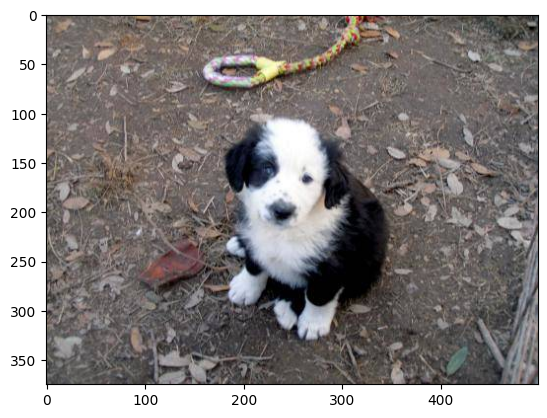

In [25]:
img_id = '1366.jpg'
image = load_img(f'/content/test1/{img_id}')
plt.imshow(image)

In [26]:
from tensorflow.keras.applications.resnet import preprocess_input

In [27]:
labels = {0:'Cats',1:'Dogs'}

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Predicton from model is Dogs


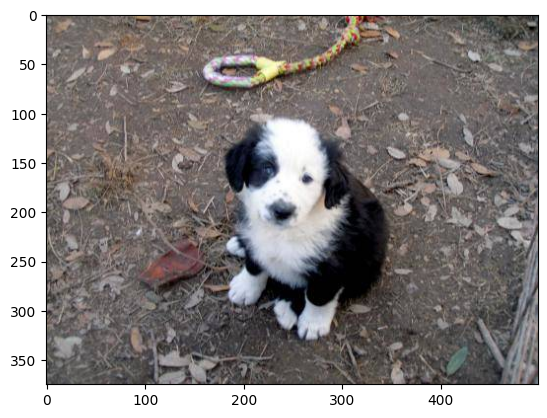

In [28]:
img_id = '1366.jpg'
image = load_img(f'/content/test1/{img_id}')
plt.imshow(image)

path = f'/content/test1/{img_id}'
img = load_img(path, target_size=Image_size)
import numpy as np
x = np.array(img)
X = np.array([x])
X = preprocess_input(X)
pred = model.predict(X)
print(f"Predicton from model is {labels[pred[0].argmax()]}")

In [29]:
predict = model.predict(n , steps = np.ceil(nb_samples/batch_size))
test['category'] = np.argmax(predict  , axis= -1)
test.head()

NameError: name 'n' is not defined